<a href="https://colab.research.google.com/github/zsxkib/Cog-in-Colab-Notebook-Examples/blob/main/SDv2_Cog_in_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Clone the Repository:
!git clone https://github.com/replicate/cog-stable-diffusion.git

Cloning into 'cog-stable-diffusion'...
remote: Enumerating objects: 707, done.
remote: Counting objects: 100% (426/426), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 707 (delta 264), reused 390 (delta 240), pack-reused 281
Receiving objects: 100% (707/707), 538.48 KiB | 11.97 MiB/s, done.
Resolving deltas: 100% (413/413), done.


In [13]:
# Navigate to the Repository:
%cd cog-stable-diffusion


/content/cog-stable-diffusion


In [15]:
# Inspect cog.yaml to find out what we need to install
%cat cog.yaml

build:
  gpu: true
  cuda: "11.8"
  python_version: "3.11.1"
  python_packages:
    - "diffusers==0.11.1"
    - "torch==1.13.0"
    - "ftfy==6.1.1"
    - "scipy==1.9.3"
    - "transformers==4.25.1"
    - "accelerate==0.15.0"
    - "huggingface-hub==0.13.2"

predict: "predict.py:Predictor"


In [16]:
# Install required packages (if it's not already installed):
!pip install PyYAML
!pip install replicate cog

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.8/428.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00


In [17]:
# Parse cog.yaml and Install Packages:
import yaml
import subprocess
import inspect
import pydoc
import urllib.request

In [18]:
# Load and parse cog.yaml
with open('cog.yaml', 'r') as file:
    cog_data = yaml.safe_load(file)

In [19]:
# Get python version, system packages and python packages, and run commands if they exist
build_data = cog_data.get('build', {})
system_packages = build_data.get('system_packages', [])
python_packages = build_data.get('python_packages', [])
run_commands = build_data.get('run', [])

In [20]:
# Function to execute shell commands
def execute_command(cmd):
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        print(f'Command failed with error: {stderr.decode()}')
    else:
        print(stdout.decode())

In [21]:
# Install system packages
if system_packages:
    system_packages_cmd = f'apt-get install -y {" ".join(system_packages)}'
    execute_command(system_packages_cmd)

In [22]:
# Install python packages
if python_packages:
    for package in python_packages:
        # Split the package string at '==' to separate the package name from the version
        package_parts = package.split('==')
        if len(package_parts) == 2:
            # If a version is specified, change the command to accept newer versions
            command = f'pip install "{package_parts[0]}>={package_parts[1]}"'
        else:
            # If no version is specified, keep the original command
            command = f'pip install {package}'

        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        stdout, stderr = process.communicate()

        if process.returncode != 0:
            print(f'Failed to install {package} or a newer version: {stderr.decode()}')
        else:
            print(f'Successfully installed {package} or a newer version: {stdout.decode()}')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.4 MB/s eta 0:00:00




In [23]:
# Execute run commands
for cmd in run_commands:
    execute_command(cmd)

In [24]:
# https://github.com/replicate/cog-stable-diffusion.git requires us to run this command (see readme of this repo)
!python script/download-weights

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.
0it [00:00, ?it/s]
2023-10-05 22:28:40.458416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Fetching 13 files:   0% 0/13 [00:00<?, ?it/s]









Fetching 13 files:   8% 1/13 [00:01<00:12,  1.05s/it]



































































































In [26]:
import predict # Since we have predict.py within the repo
from IPython.display import display, Image  # Importing necessary functions for displaying images

In [27]:
p = predict.Predictor()
p.setup()

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Loading pipeline...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [28]:
# Get the documentation and signature of the predict method
method_signature = inspect.signature(p.predict)
method_docstring = pydoc.getdoc(p.predict)

# Format and print the method signature and docstring
print(f'Method: {p.__class__.__name__}.predict')
print(f'Description: {method_docstring}')

# Iterate through the parameters in the signature to print each on a new line
for name, param in method_signature.parameters.items():
    param_details = f'{name}: {param.annotation}'
    if param.default != param.empty:
        param_details += f' = {param.default}'
    print(f'  - {param_details}')

# Print the return type
print(f'Returns: {method_signature.return_annotation}')

Method: Predictor.predict
Description: Run a single prediction on the model
  - prompt: <class 'str'> = default='a photo of an astronaut riding a horse on mars' description='Input prompt' extra={'choices': None}
  - negative_prompt: <class 'str'> = description='Specify things to not see in the output' extra={'choices': None}
  - width: <class 'int'> = default=768 description='Width of output image. Maximum size is 1024x768 or 768x1024 because of memory limits' extra={'choices': [128, 256, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024]}
  - height: <class 'int'> = default=768 description='Height of output image. Maximum size is 1024x768 or 768x1024 because of memory limits' extra={'choices': [128, 256, 384, 448, 512, 576, 640, 704, 768, 832, 896, 960, 1024]}
  - num_outputs: <class 'int'> = default=1 description='Number of images to output.' ge=1 le=4 extra={'choices': None}
  - num_inference_steps: <class 'int'> = default=50 description='Number of denoising steps' ge=1 le=500 

In [34]:
# Calling the predict method with default arguments
results = p.predict(
    prompt='a photo of an astronaut riding a horse on mars',  # Default value for 'prompt'
    negative_prompt='',  # There's no default specified so I'm assuming an empty string
    width=768,  # Default value for 'width'
    height=768,  # Default value for 'height'
    num_outputs=1,  # Default value for 'num_outputs'
    num_inference_steps=50,  # Default value for 'num_inference_steps'
    guidance_scale=7.5,  # Default value for 'guidance_scale'
    scheduler='DPMSolverMultistep',  # Default value for 'scheduler'
    seed=None  # There's no default specified so I'm assuming it's None
) # Remember that results is a list!

Using seed: 25507


  0%|          | 0/50 [00:00<?, ?it/s]

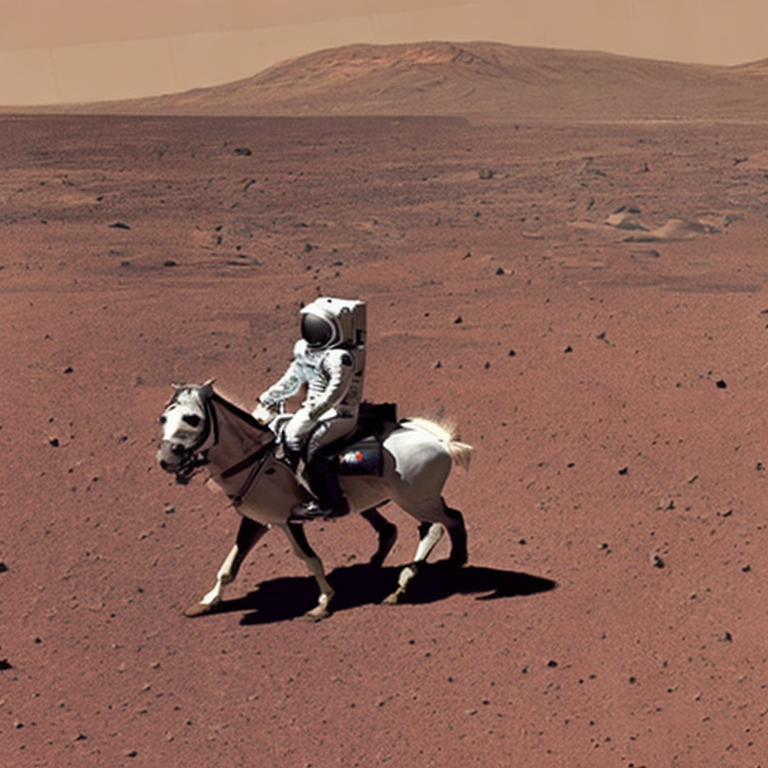

In [35]:
for result in results:
    # Displaying the output image
    output_image_path = str(result)  # Path to the output image
    display(Image(filename=output_image_path, width=400))
